# Configuración inicial

* En este notebook vamos a descargar el dataset `book` que contiene muchos libros en ingles en formato de texto tokenizado, de los cuales vamos a hacer procesamiento.

In [ ]:
import nltk
nltk.download('book')
from nltk.book import *
import matplotlib.pyplot as plt
import numpy as np

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package dependency_treebank is already up-to-date!
[nltk_data]    | Downloadi

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


# Analizando un texto

In [ ]:
# Obtener la lista de textos del corpus "book"
textos = texts() #obtengo una lista de textos el metodo texts() de NLTK
print(type(textos))


text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908
<class 'NoneType'>


In [ ]:
# escogemos text1 que es el famoso libro Moby Dick
# Vemos que el texto ya viene tokenizado incluyendo caracteres especiales ....
text1.tokens[:5]

['[', 'Moby', 'Dick', 'by', 'Herman']

In [ ]:
# ¿Cuantos tokens tiene el libro?
len(text1)

260819

## Medida de riqueza lexica en un texto:
$$ R_l = \frac{\text{total de palabras únicas}}{\text{total de palabras}} = \frac{\text{longitud del vocabulario}}{\text{longitud del texto}}$$

### Funcion set()


La función set() en Python se utiliza para crear un conjunto, que es una colección desordenada de elementos únicos. En este caso, set(text1) crea un conjunto que contiene todos los elementos únicos (palabras) del texto text1. Al utilizar set(), se eliminan las repeticiones de palabras, ya que un conjunto no permite elementos duplicados.


In [ ]:
vocabulario = set(text1)
type(voca)

set

La funcion set() me devuelve un elemento set (conjunto).

En Python, set es un tipo de dato que representa un conjunto. Un conjunto es una colección desordenada y no indexada de elementos únicos.

Las características principales de los conjuntos son:
*Los elementos en un conjunto son únicos. No se permiten duplicados.
*Los elementos en un conjunto no tienen un orden específico. No se puede acceder a ellos mediante índices.

Por ello para poder iterar y accedere por medio de indices utilizamos la funcion sorted() que nos devuelve una Lista.

La función **sorted()** en Python se utiliza para ordenar elementos en una secuencia. Puede ser aplicada a listas, tuplas, conjuntos y otros tipos de datos iterables.
De esta forma podes usar print(vacabulario) sino te da error



Definimos la riqueza lexica

In [ ]:
# Primero realizamos la construcción de un vocabulario (identificamos las palabras unicas que hay en el libro)
# https://docs.python.org/2/library/sets.html
vocabulario = sorted(set(text1))
vocabulario[1000:1010] #muestra

['Crew',
 'Crish',
 'Crockett',
 'Cross',
 'Crossed',
 'Crossing',
 'Crotch',
 'Crowding',
 'Crown',
 'Crozetts']

In [ ]:
# luego definimos la medida de riqueza léxica:
rl = len(set(text1))/len(text1) #cantidad de palabra unicas dividido la cantidad de palabras que tiene el texto
print(rl)

0.07406285585022564


Riqueza Lexica de todos los textos del corpus para Comparar

In [ ]:
# podemos definir funciones en python para estas medidas léxicas:
def riqueza_lexica(texto):
  return len(set(texto))/len(texto)

def porcentaje_palabra(palabra, texto):
  return 100*texto.count(palabra)/len(texto)

print("Riqueza léxica del texto1:",riqueza_lexica(text1))
print("Riqueza léxica del texto2:",riqueza_lexica(text2))
print("Riqueza léxica del texto3:",riqueza_lexica(text3))
print("Riqueza léxica del texto4:",riqueza_lexica(text4))
print("Riqueza léxica del texto5:",riqueza_lexica(text5))
print("Riqueza léxica del texto6:",riqueza_lexica(text6))
print("Riqueza léxica del texto7:",riqueza_lexica(text7))
print("Riqueza léxica del texto8:",riqueza_lexica(text8))

Riqueza léxica del texto1: 0.07406285585022564
Riqueza léxica del texto2: 0.04826383002768831
Riqueza léxica del texto3: 0.06230453042623537
Riqueza léxica del texto4: 0.06556530042314962
Riqueza léxica del texto5: 0.13477005109975562
Riqueza léxica del texto6: 0.1276595744680851
Riqueza léxica del texto7: 0.12324685128531129
Riqueza léxica del texto8: 0.22765564002465585


otra forma de hacerlo


In [ ]:
import re
def lexical_affluence(corpus):
    vocabulary = sorted(set(corpus))
    return len(vocabulary)/len(corpus)


#se crea una lista llamada texts utilizando una comprensión de lista.
#Esta lista contiene los nombres de los textos disponibles en el módulo nltk.book que coinciden con el patrón "text\d", donde \d representa cualquier dígito

texts = [ i for i in dir(nltk.book) if re.search(r'text\d', i)]
for text in texts:
    #Para cada text, se ejecuta una cadena de código utilizando exec() y compile().
    #Esta cadena de código imprime el nombre del texto, un salto de línea, el resultado de llamar a lexical_affluence con el texto como argumento, y otro salto de línea:
    exec(compile(f'print({text}.name, "\\n", lexical_affluence({text}), "\\n" )',
        '', 'exec'))

Moby Dick by Herman Melville 1851 
 0.07406285585022564 

Sense and Sensibility by Jane Austen 1811 
 0.04826383002768831 

The Book of Genesis 
 0.06230453042623537 

Inaugural Address Corpus 
 0.06556530042314962 

Chat Corpus 
 0.13477005109975562 

Monty Python and the Holy Grail 
 0.1276595744680851 

Wall Street Journal 
 0.12324685128531129 

Personals Corpus 
 0.22765564002465585 

The Man Who Was Thursday by G . K . Chesterton 1908 
 0.0983485761345412 



esta etructura "texts = [ i for i in dir(nltk.book) if re.search(r'text\d', i)]" se llama lista por comprension.

https://www.analyticslane.com/2019/09/23/listas-por-comprension-en-python/

El mismo codigo con un enfoque más tradicional con un ciclo for y una estructura de control if seria:

In [ ]:
import re
def lexical_affluence(corpus):
    vocabulary = sorted(set(corpus))
    return len(vocabulary) / len(corpus)

texts = []
for i in dir(nltk.book):
    if re.search(r'text\d', i):
        texts.append(i)

for text in texts:
    #Para cada text, se ejecuta una cadena de código utilizando exec() y compile().
    #Esta cadena de código imprime el nombre del texto, un salto de línea, el resultado de llamar a lexical_affluence con el texto como argumento, y otro salto de línea:
    exec(compile(f'print({text}.name, "\\n", lexical_affluence({text}), "\\n" )',
        '', 'exec'))

Moby Dick by Herman Melville 1851 
 0.07406285585022564 

Sense and Sensibility by Jane Austen 1811 
 0.04826383002768831 

The Book of Genesis 
 0.06230453042623537 

Inaugural Address Corpus 
 0.06556530042314962 

Chat Corpus 
 0.13477005109975562 

Monty Python and the Holy Grail 
 0.1276595744680851 

Wall Street Journal 
 0.12324685128531129 

Personals Corpus 
 0.22765564002465585 

The Man Who Was Thursday by G . K . Chesterton 1908 
 0.0983485761345412 



No puedo realizar un for del tipo

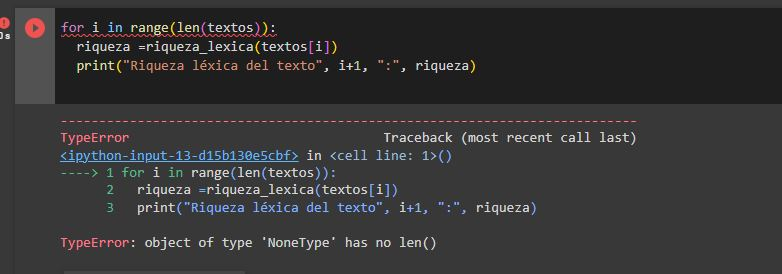


 porque textos es un tipo de dato llamado NoneType como vemos con el siguiente codigo

In [ ]:
type(textos)


NoneType

In [ ]:
# podemos calcular el porcentaje de texto que ocupa una palabra en una cadena larga de texto.
porcentaje_palabra('monster', text1)

0.018786974875296663

In [ ]:
# y calcular en conteo el numero de veces que aparece:
text1.count('monster')

49

# Estadistica del Lenguaje

Los cálculos estadísticos más simples que se pueden efectuar sobre un texto o un corpus son los relacionados con frecuencia de aparición de palabras.

* Podemos construir un diccionario en Python donde las llaves sean las palabras y los valores sean las frecuencias de ocurrencias de esas palabras.

* ejemplo `dic = {'monster': 49 ,  'boat': 54,  ...}`


In [ ]:
# METODO NO recomendable para conjuntos muy grandes
dic = {}
for palabra in set(text1):                           # por cada palabra del conjunto
  #dic[palabra] = porcentaje_palabra(palabra, text1)
  dic[palabra] = text1.count(palabra)
dic

Hacerlo de esta manera es muy pesado computacionalmente.
por lo que usar este codigo no implicaria una aplicacion escalable. (rapida y masiva)

## Método FreqDist de NLTK

In [ ]:
# NLTK tiene un metodo muy eficiente
fdist = FreqDist(text1)

In [ ]:
fdist.most_common(20)    #las 20 palabras (token) mas frecuentes o que mas se repiten

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632)]

In [ ]:
fdist['monster'] #calcula numero de veces que se repite la palabra monster

49

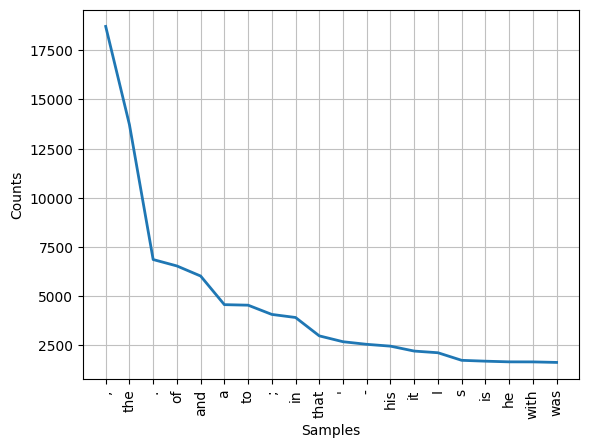

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
fdist.plot(20) # grafica las 20 palabras mas frecuentes o que mas se repiten

### Ley de Potencias (Grafico en escala logaritmica (log-log))

Tanto en el libro de Moby Dick como en cualquier obra ( un periódico, la biblia, etc.) **la distribución de palabras sigue una ley de potencias (o power law).** Una explicación a este fenómeno se da con la criticalidad auto-organizada. Para verificar si se cumple esta ley de potencias se debe verifica una tendencia linear graficando en escala logarítmica ambos ejes (un gráfico log-log). En el caso del libro de Moby Dick tenemos:

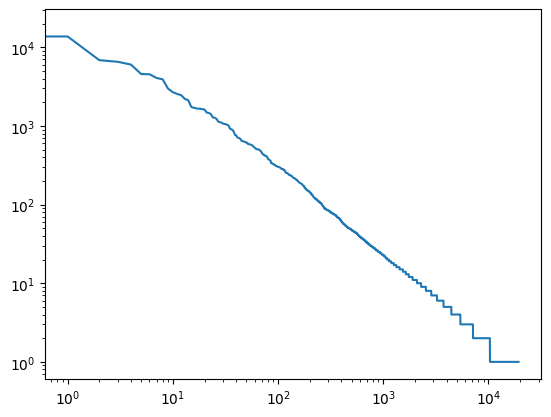

In [ ]:
a=list(fdist.values())  #Convierte los valores de frecuencia a una lista, de esta manera
a=np.array(a)           #Convierte la lista en un array sobre el que puedo aplicar los metodos de la libreria Numpy.
                        #lo cual permite realizar operaciones numéricas eficientes en los datos.
a=np.sort(a)            #Ordena el array en orden ascendente
a=a[::-1]               #Invierte el orden de los elementos en el array a, de modo que ahora se encuentran en orden descendente.
plt.yscale('log')       #Establece la escala del eje y del gráfico como logarítmica.
plt.xscale('log')       #Establece la escala del eje x del gráfico como logarítmica.
plt.plot(a)

Y es interesante ver tambien que esta ley se satisface en otros contextos afuera del procesamiento de lenguaje natural y la lingüística en general.

Es decir que un sistema como el lenguaje en términos de la distribución estadística de aparición de palabras (sistema desordenado, complejo, inestable, critico) aparece una regla (ley de potencias) indicando que la aparición de palabras en el lenguaje puede ser fruto de un sistema crítico auto-organizado, al igual que otros fenómenos presentes en la Naturaleza.

### Analizo el texto 9

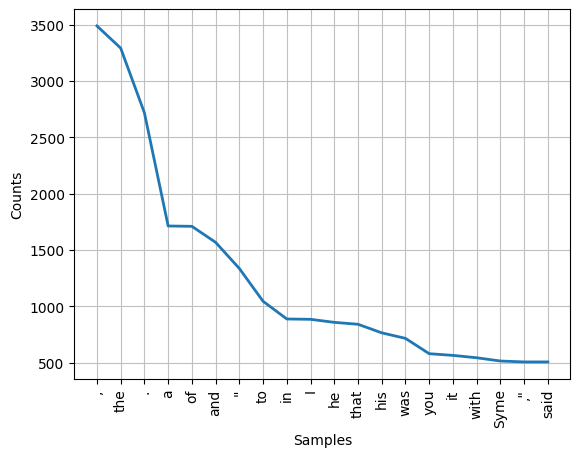

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
fdist = fdist = FreqDist(text9)

fdist.plot(20)


Con estos graficos podemos comparar y analizar la tendencia de uso masivo en determinadas palabra o signos

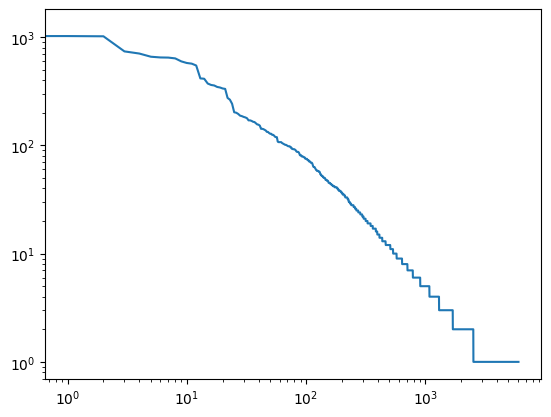

In [ ]:
# veo que para el texto 6 tambien sigue la ley de potencias
fdist = FreqDist(text9)

a=list(fdist.values())
a=np.array(a)
a=np.sort(a)
a=a[::-1]
plt.yscale('log')
plt.xscale('log')
plt.plot(a)

## Distribuciones sobre contenido con filtro-fino

* Como vimos en la sección anterior, los tokens más frecuentes en un texto no son necesariamente las palabras que mas informacion nos arrojan sobre el contenido del mismo.
* Por ello, es mejor filtrar y construir distribuciones de frecuencia que no consideren signos de puntuación o caracteres especiales

In [ ]:
# Tal vez sea más interesante estudiar palabras que tengan una longitud minima especifica
long_words = [palabra for palabra in text1 if len(palabra)>5]
vocabulario_filtrado = sorted(set(long_words))
vocabulario_filtrado[:10]

['ACCOUNT',
 'ADDITIONAL',
 'ADVANCING',
 'ADVENTURES',
 'AFFGHANISTAN',
 'AFRICA',
 'AGAINST',
 'ALFRED',
 'ALGERINE',
 'AMERICA']

Podemos ahora construir una lista de tuplas, basados en los conteos ya pre-calculados de la función `FreqDist`, así:

`fdist_filtrado = [('account', 2), ('additional', 32), ('advancing', 5), ...]`

Luego podemos convertir el objeto creado a formato de `np.array`de **Numpy** para poder hacer un sort por palabras mas frecuentes.

`fdist_filtrado = np.array(fdist_filtrado, *args)`

`np.sort(fdist_filtrado, *args) = [('account', 2), ('advancing', 5), ('additional', 32), ...]`

In [ ]:
palabras_interesantes = [(palabra, fdist[palabra]) for palabra in set(text1) if len(palabra)>5 and fdist[palabra]>10]
dtypes = [('word', 'S10'), ('frequency', int)]
palabras_interesantes = np.array(palabras_interesantes, dtype=dtypes)
palabras_ordenadas = np.sort(palabras_interesantes, order = 'frequency')
palabras_ordenadas[-20:] # top de palabras mas frecuentes

array([(b'between', 117), (b'something', 119), (b'against', 132),
       (b'things', 132), (b'thought', 149), (b'CHAPTER', 150),
       (b'without', 154), (b'Pequod', 172), (b'should', 181),
       (b'almost', 186), (b'Starbuck', 196), (b'himself', 203),
       (b'Captain', 215), (b'through', 227), (b'whales', 237),
       (b'little', 247), (b'Queequeg', 252), (b'seemed', 283),
       (b'before', 293), (b'though', 335)],
      dtype=[('word', 'S10'), ('frequency', '<i8')])

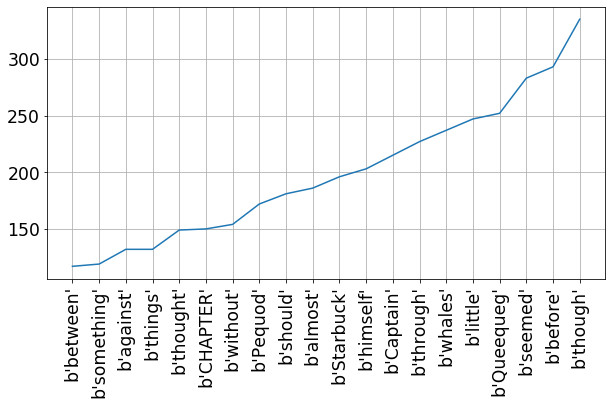

In [ ]:
# Construccion de un grafico de barras customizado con Matplotlib
# https://matplotlib.org/3.1.1/gallery/ticks_and_spines/custom_ticker1.html#sphx-glr-gallery-ticks-and-spines-custom-ticker1-py
top_words = 20
x = np.arange(len(palabras_ordenadas[-top_words:]))
y = [freq[1] for freq in palabras_ordenadas[-top_words:]]
plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.xticks(x, [str(freq[0]) for freq in palabras_ordenadas[-top_words:]], rotation = 'vertical')
plt.tick_params(labelsize = 'xx-large')
plt.grid(True)
plt.show()